In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import validate_case

In [2]:
case = "smyle.control.perlmutter.004"

In [3]:
# Parameters
case = "smyle.oae-map.North_Atlantic_basin.000.1999-04-01.003"


In [4]:
%%time
ds_o = xr.open_zarr(validate_case.zarr_validation_data(case)).compute()
ds_o

CPU times: user 489 ms, sys: 438 ms, total: 927 ms
Wall time: 986 ms


<xarray.Dataset> Size: 17MB
Dimensions:           (nlat: 384, nlon: 320, time: 180)
Coordinates:
    TLAT              float64 8B -79.22
    TLONG             float64 8B 320.6
    ULAT              float64 8B -78.95
    ULONG             float64 8B 321.1
  * time              (time) object 1kB 0347-04-30 00:00:00 ... 0362-03-31 00...
    z_t               float32 4B 500.0
    z_t_150m          float32 4B 500.0
    z_w_top           float32 4B 9e+03
Dimensions without coordinates: nlat, nlon
Data variables: (12/70)
    ALK_ALT_CO2_diff  (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    ALK_ALT_CO2_rmse  (time) float64 1kB 0.0115 0.03951 0.0509 ... 0.1791 0.1135
    DIC_ALT_CO2_diff  (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    DIC_ALT_CO2_rmse  (time) float64 1kB 0.0162 0.05345 ... 0.2135 0.1594
    DOC_diff          (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    DOC_rmse          (time) float64 1kB 0.002986 0.008295 ... 0.02532 0.02236
    ...                ...
    spFe_diff         (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    spFe_rmse         (time) float64 1kB 2.225e-08 7.685e-08 ... 1.381e-07
    spP_diff          (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    spP_rmse          (time) float64 1kB 5e-06 1.539e-05 ... 2.252e-05 3.81e-05
    zooC_diff         (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    zooC_rmse         (time) float64 1kB 0.0004669 0.00137 ... 0.006014 0.005438

In [5]:
variables = [v[:-5] for v in ds_o.variables if "_rmse" in v]

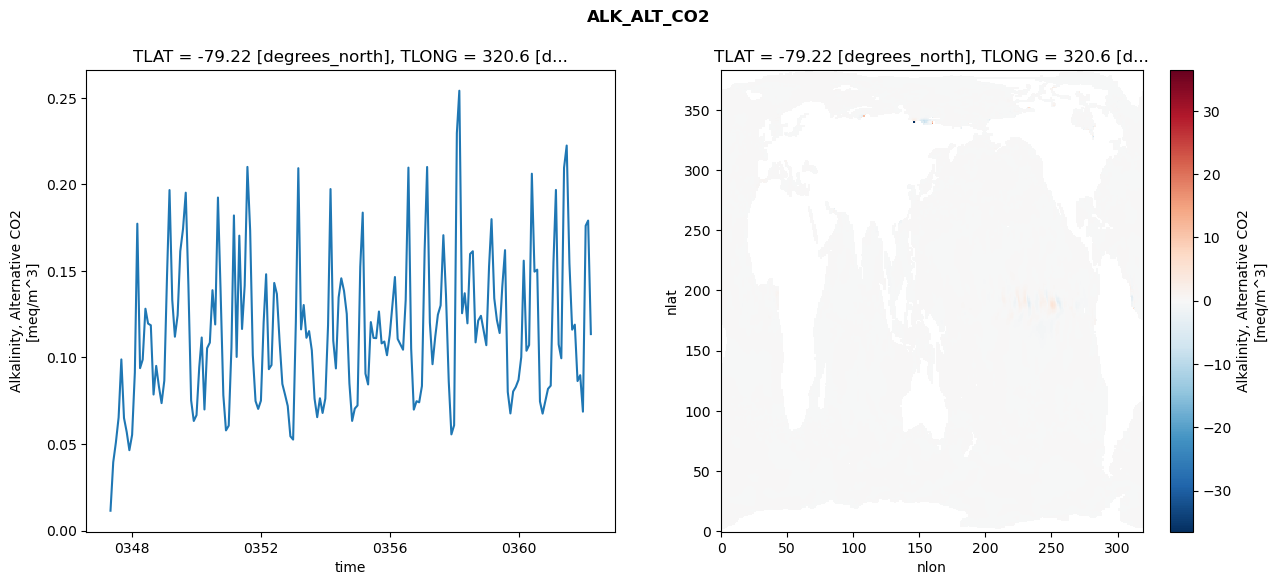

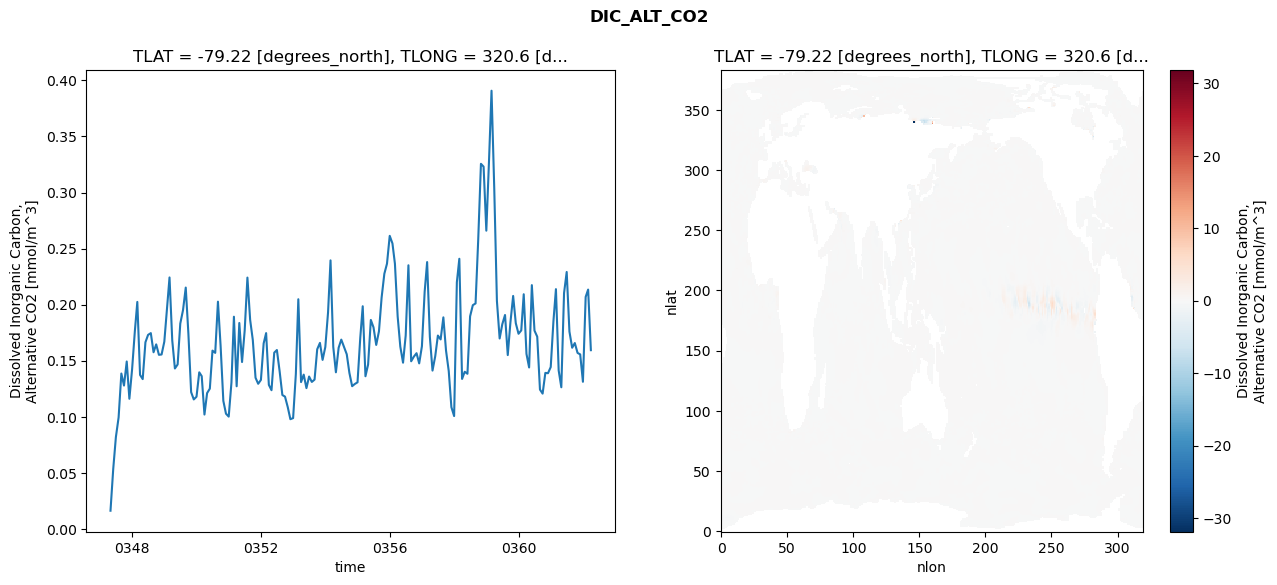

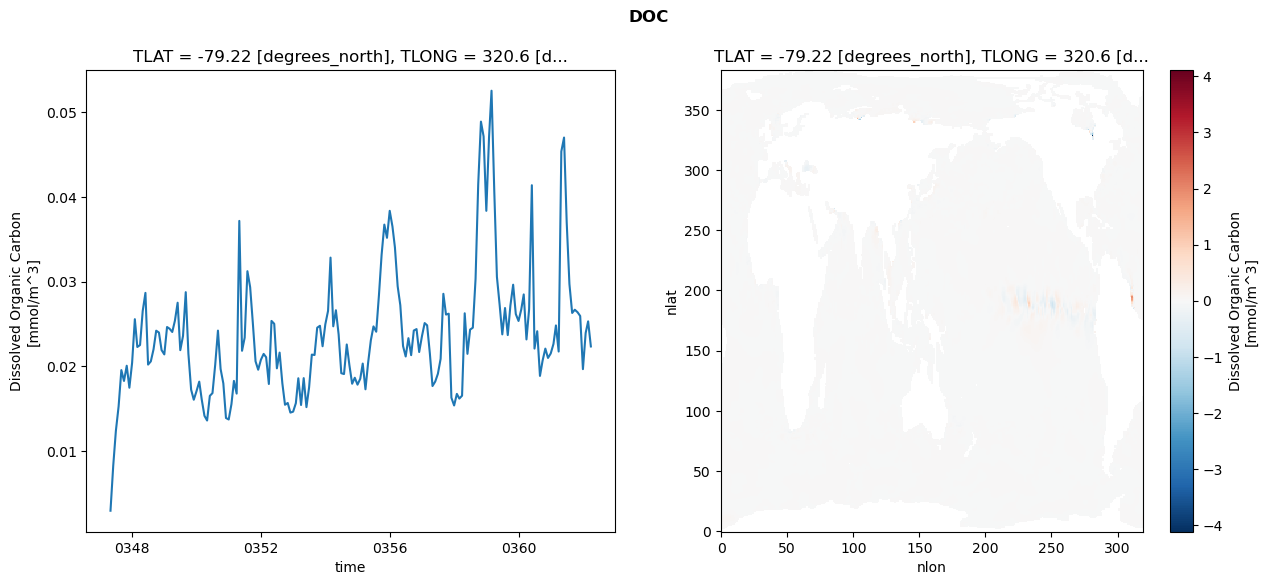

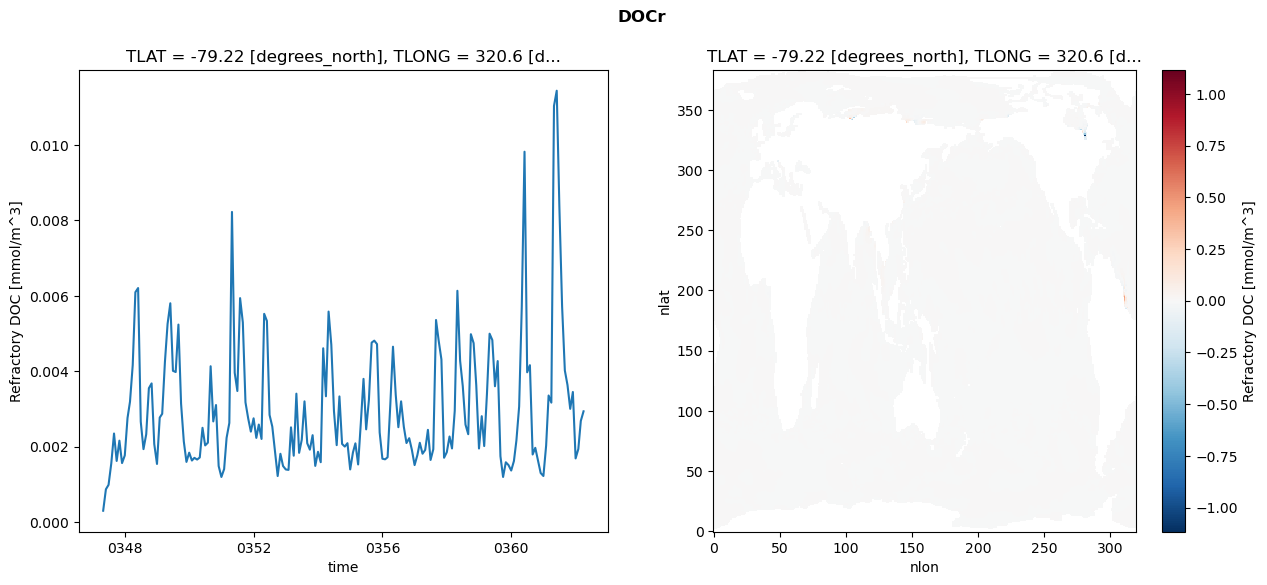

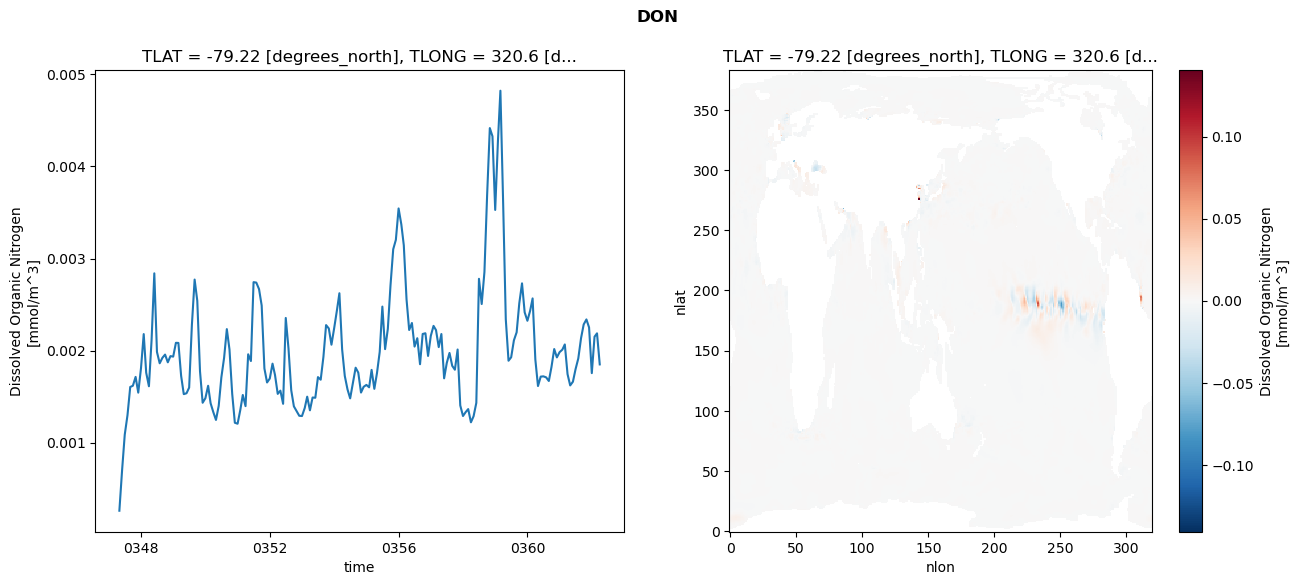

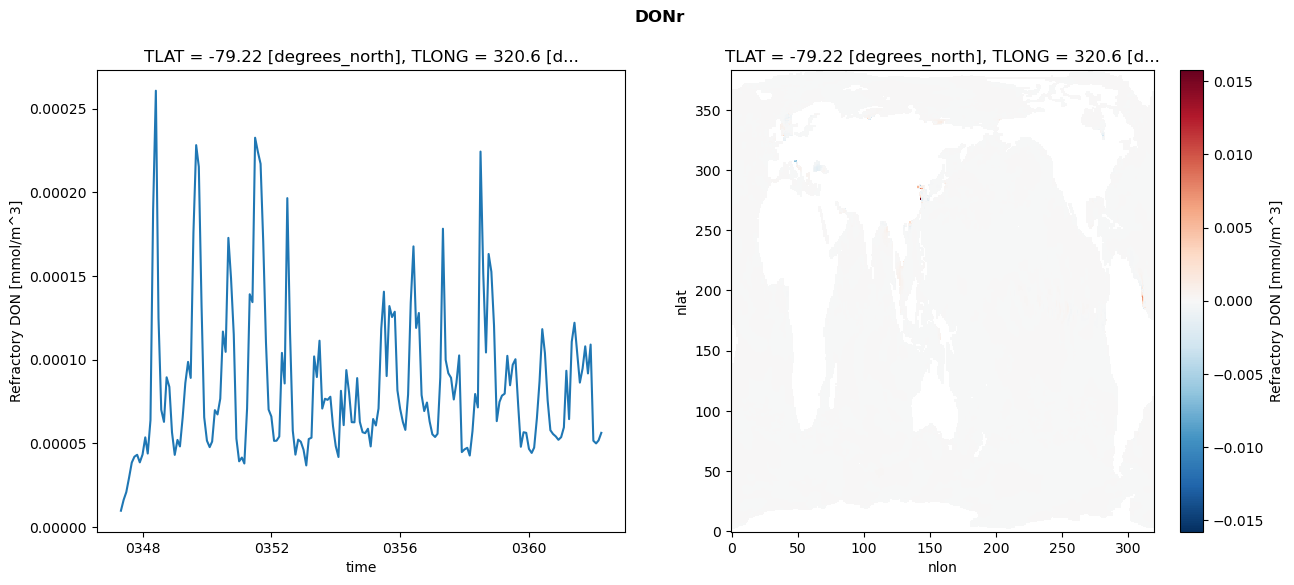

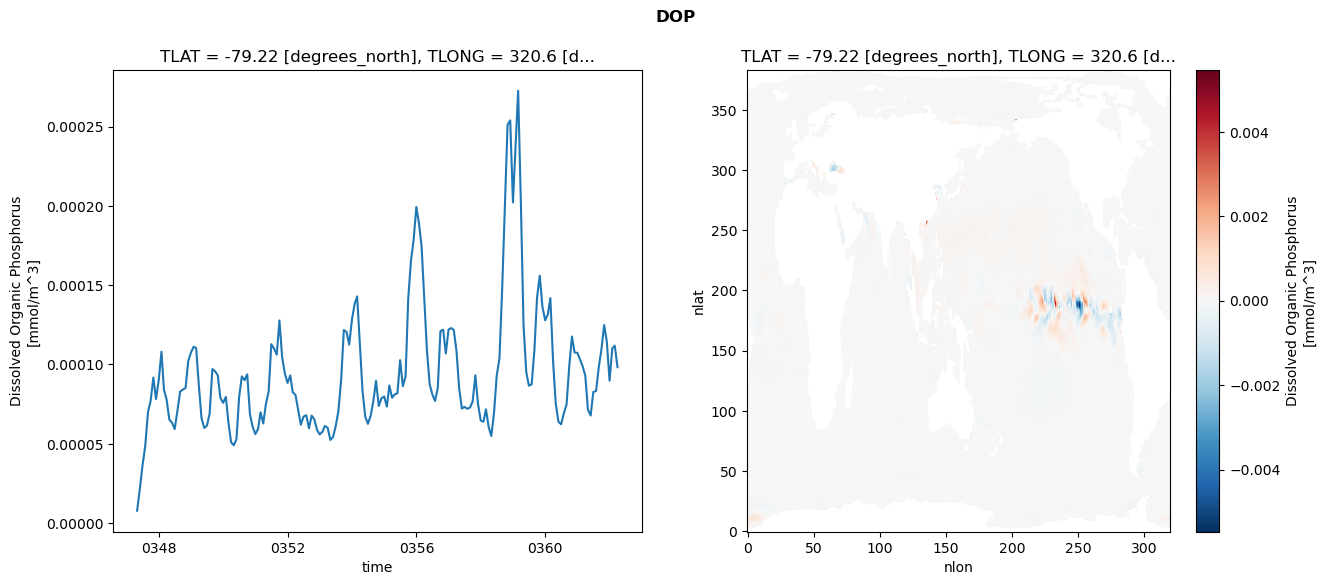

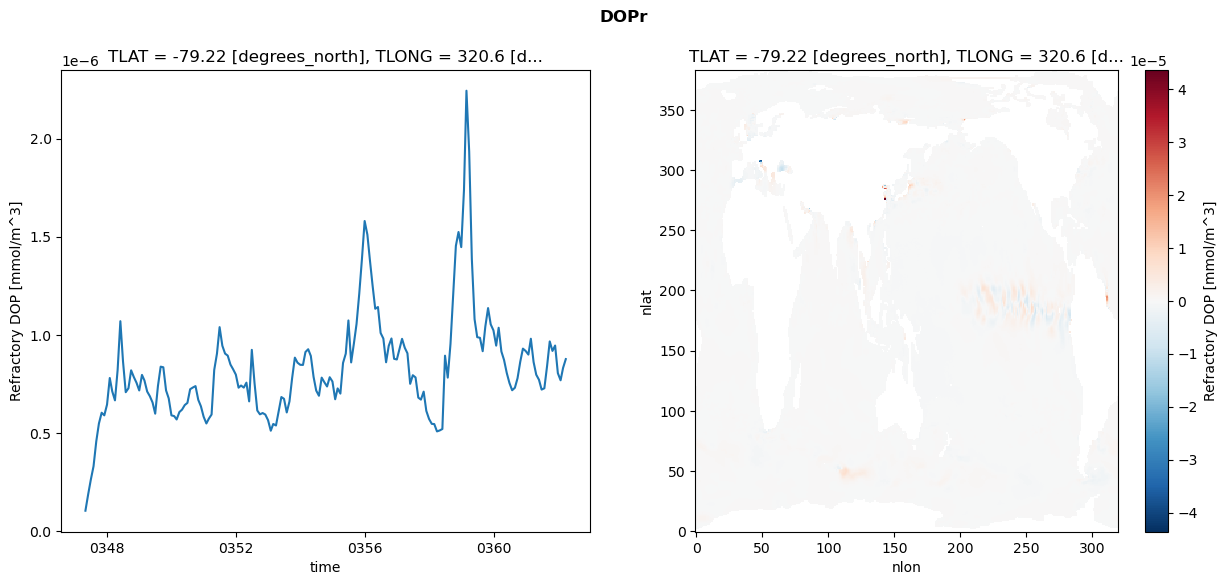

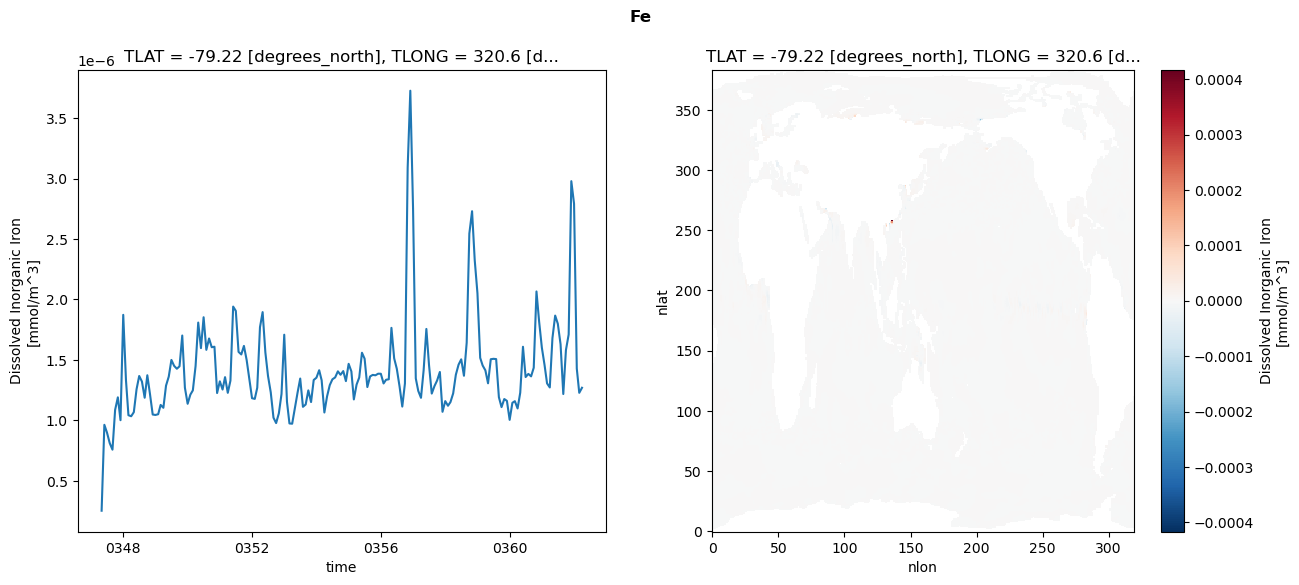

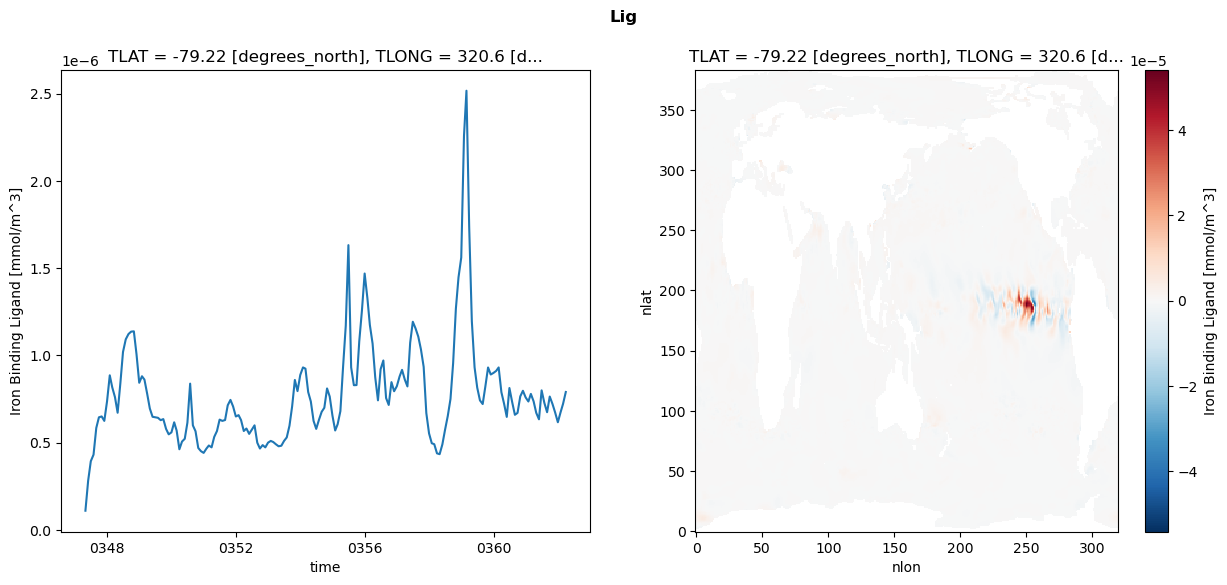

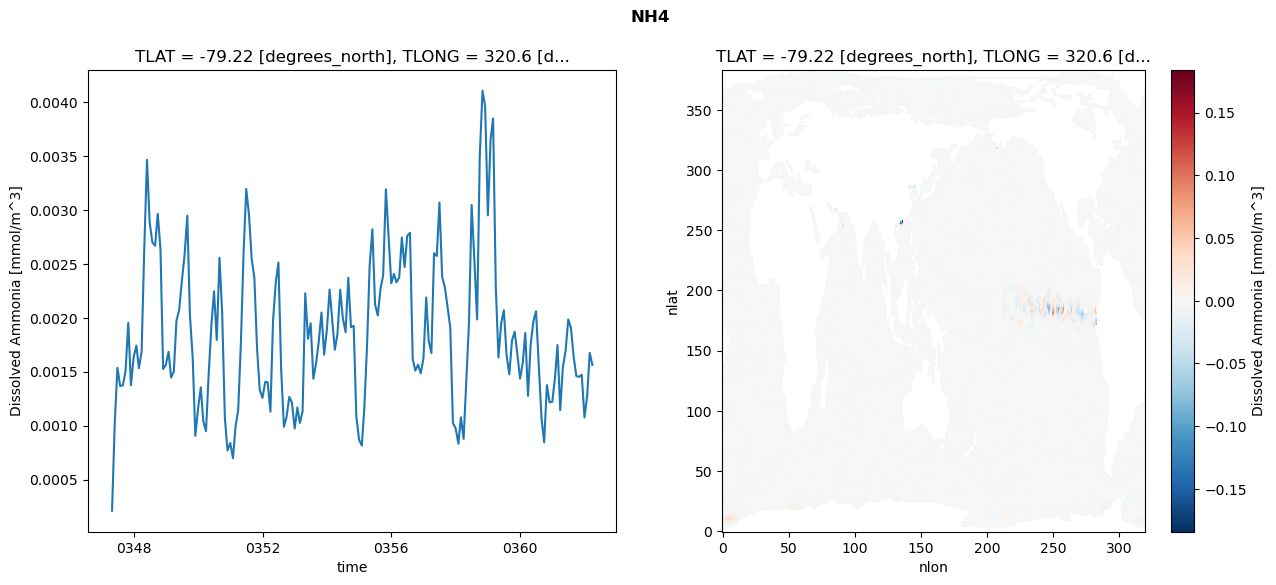

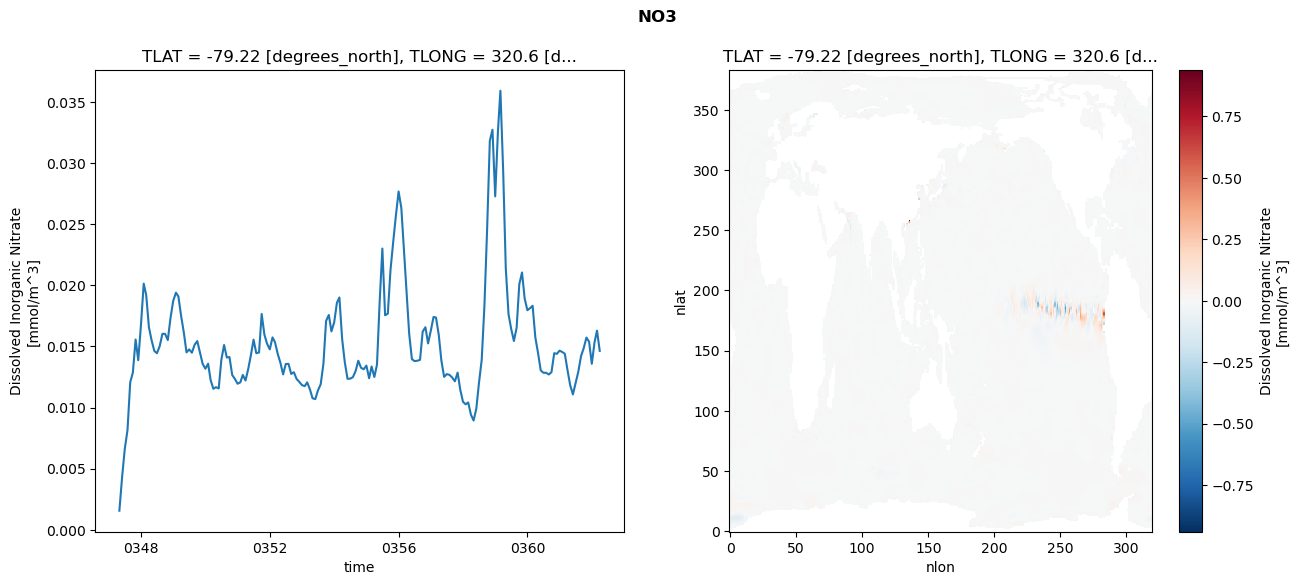

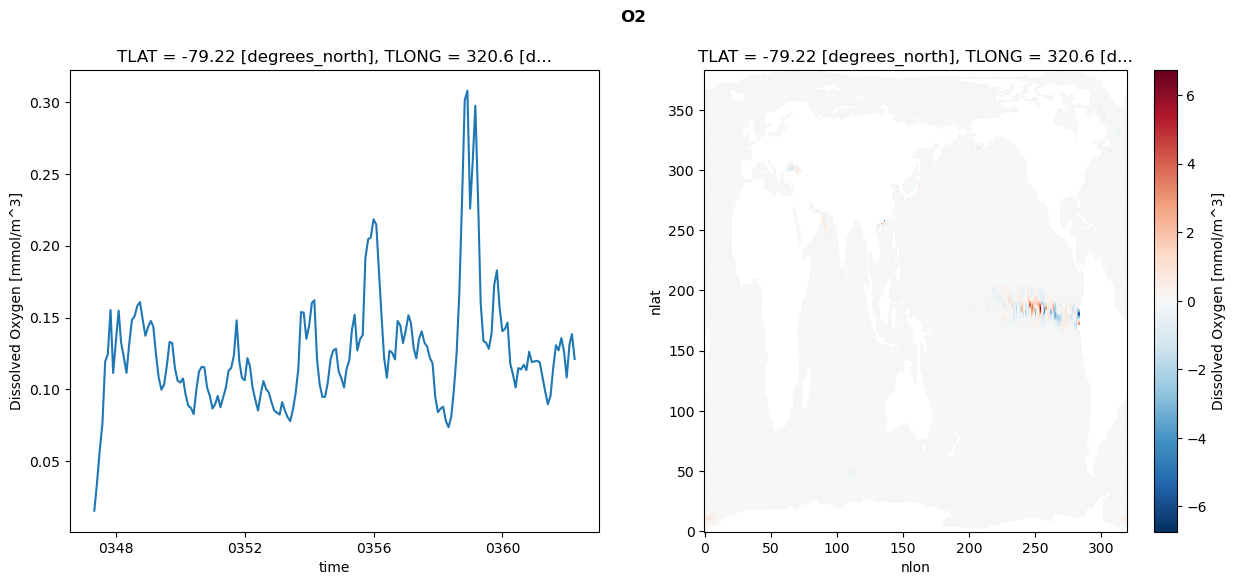

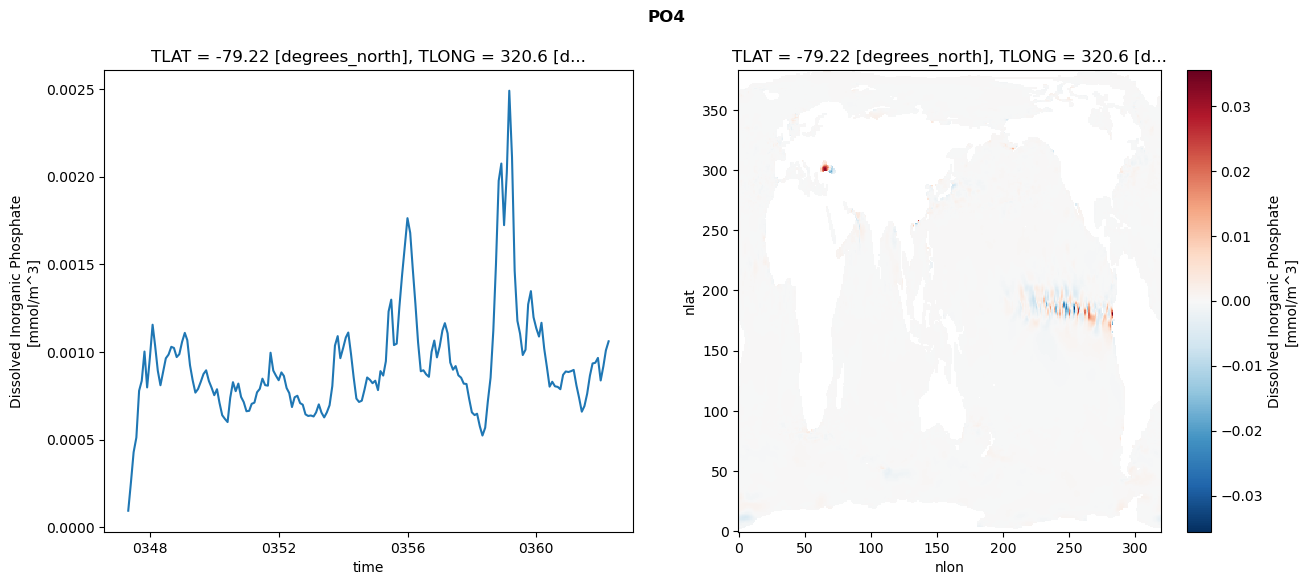

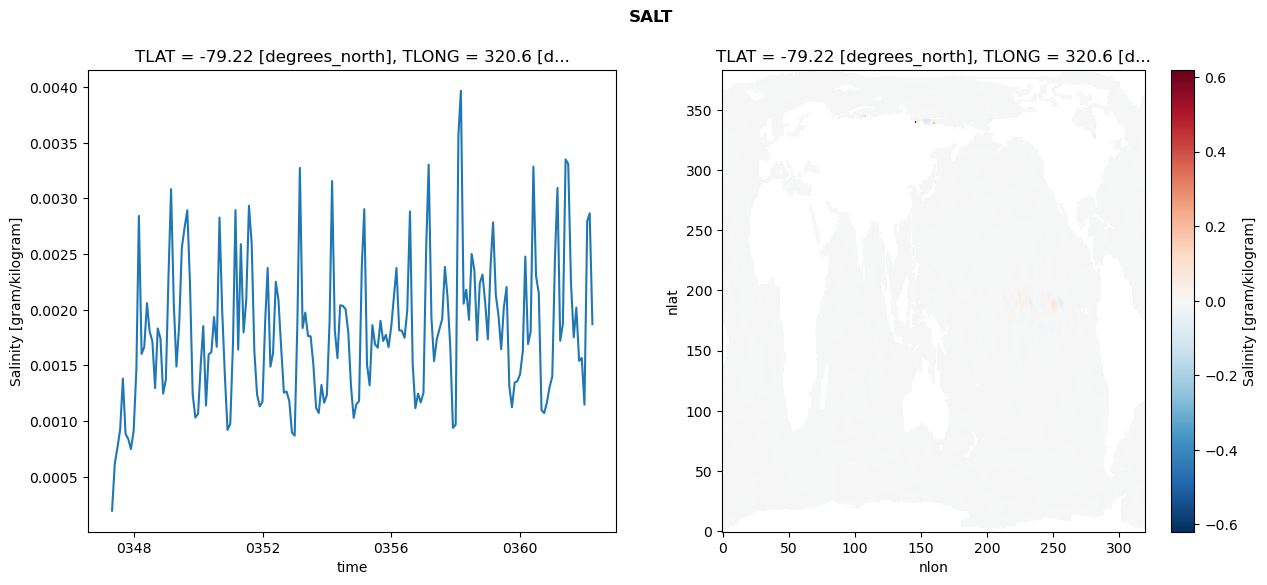

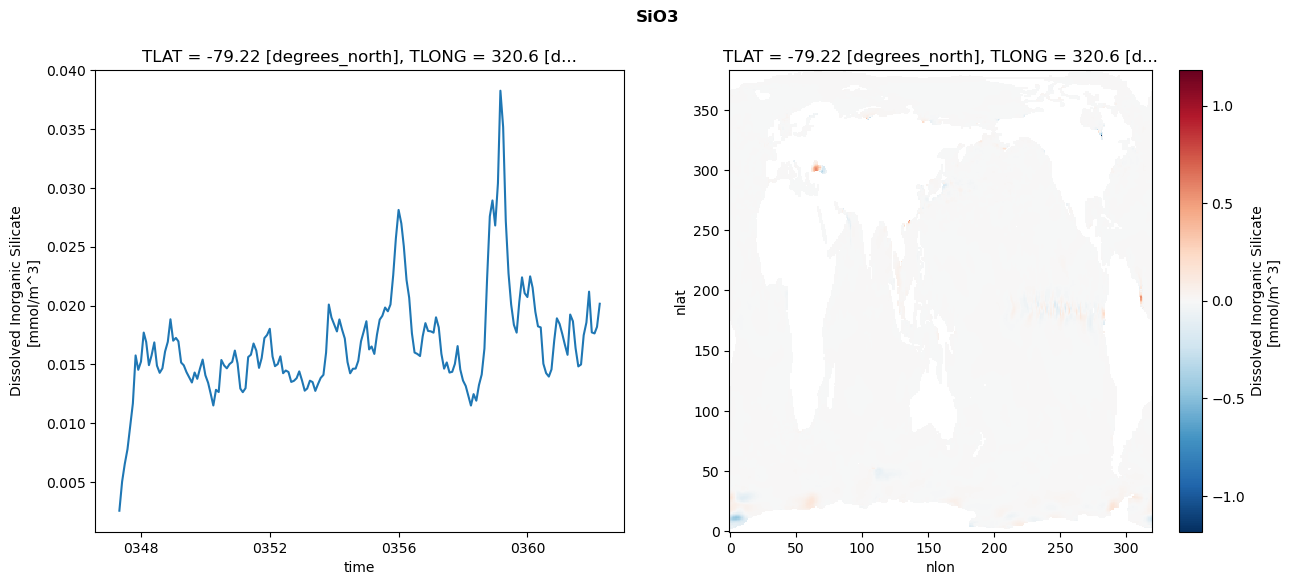

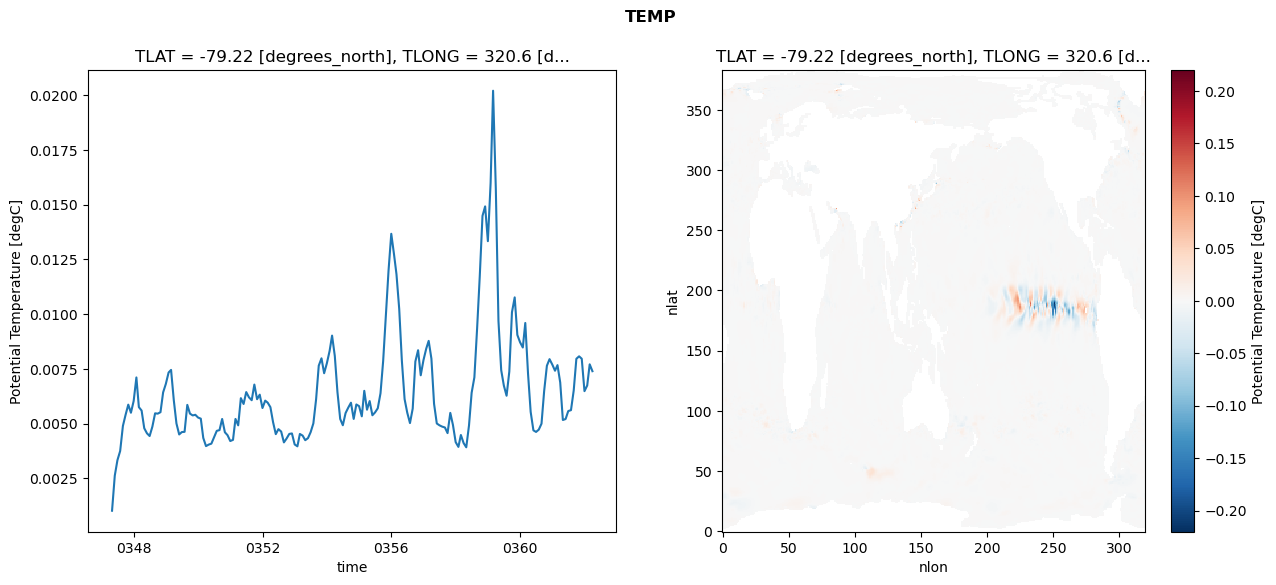

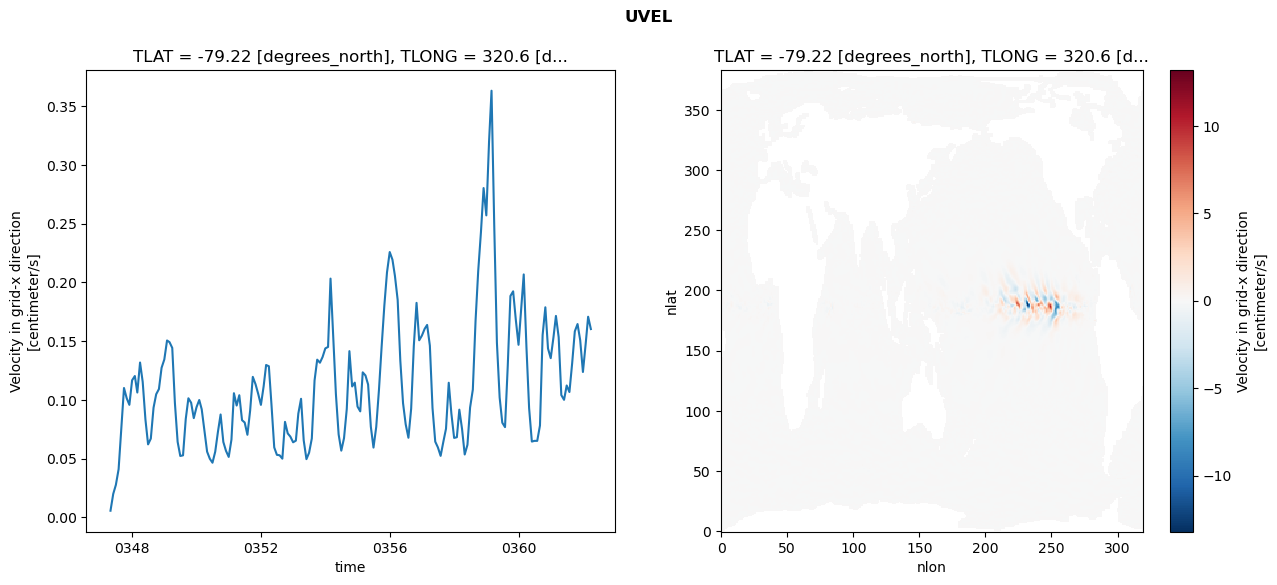

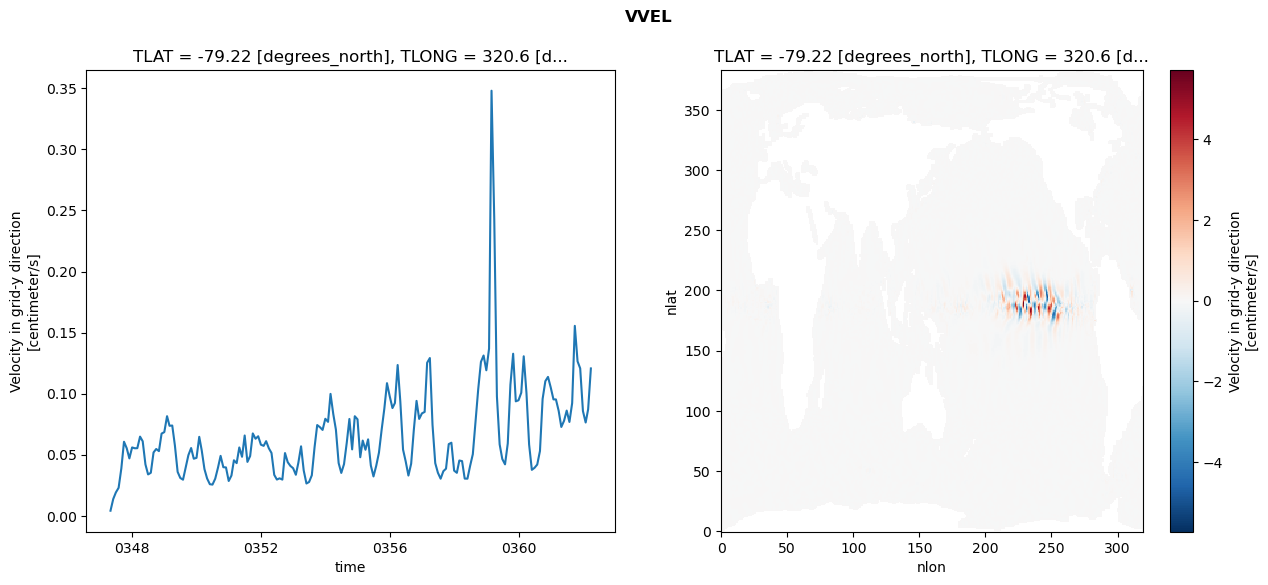

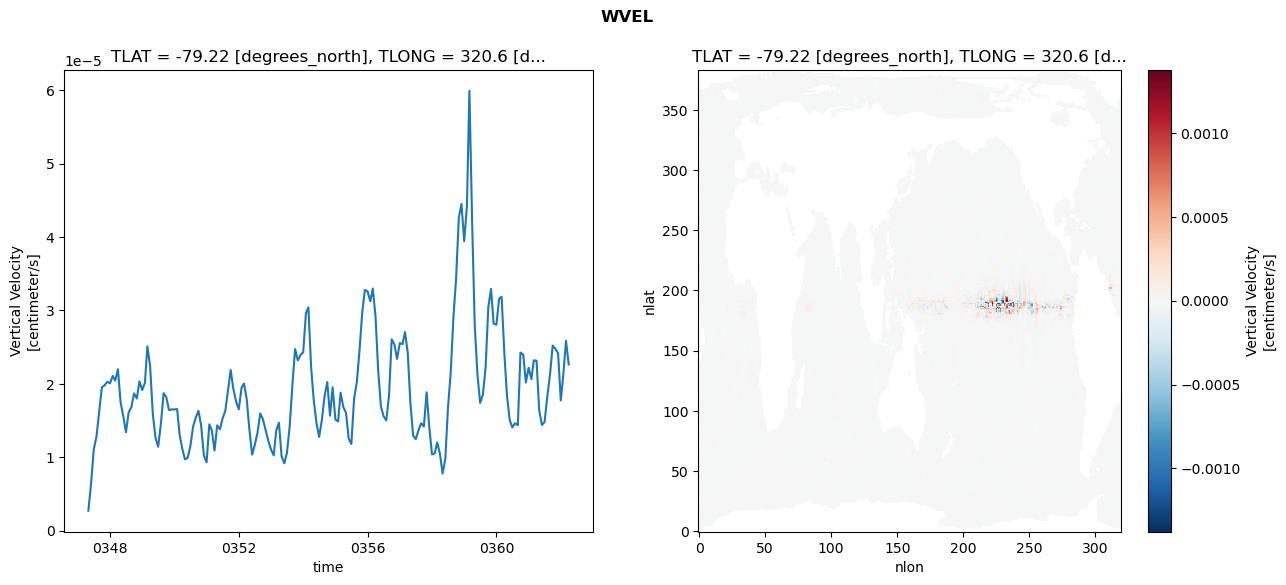

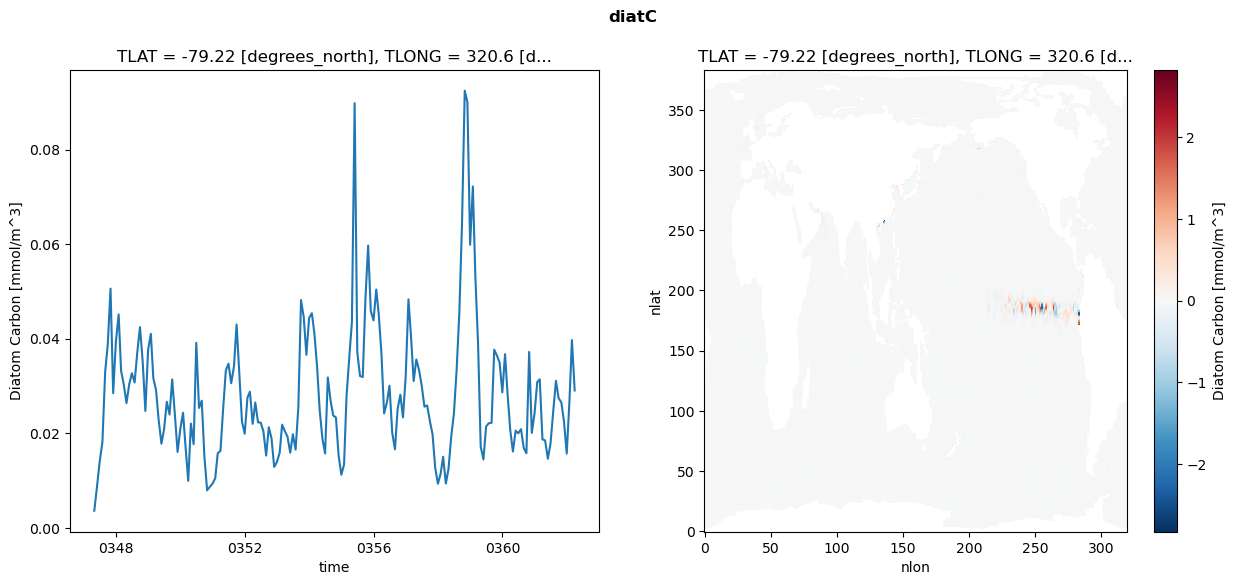

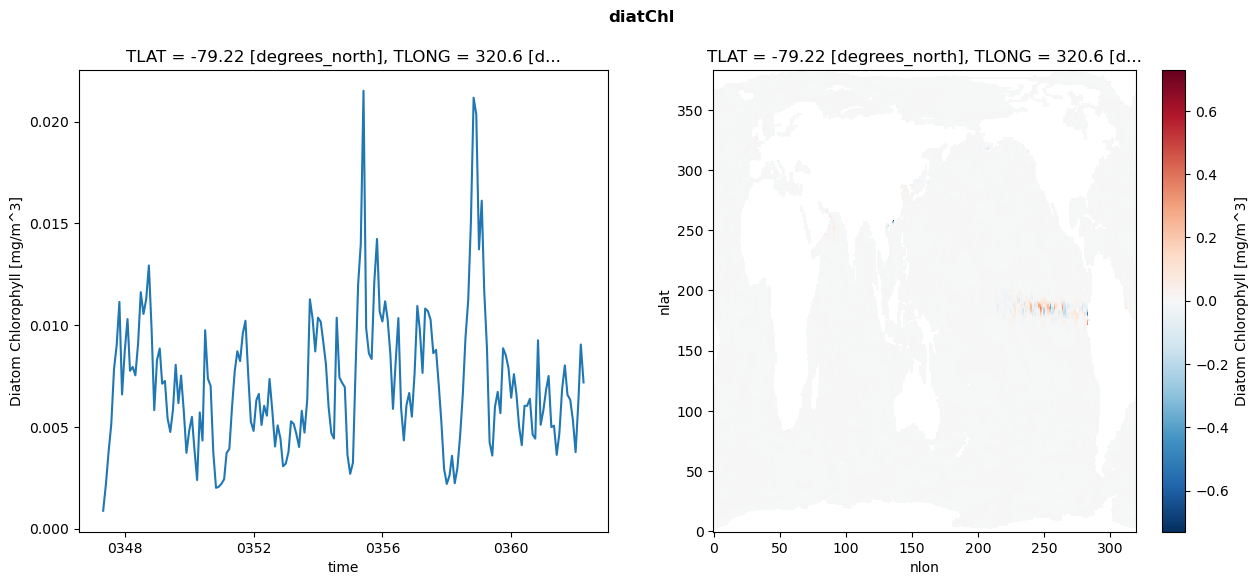

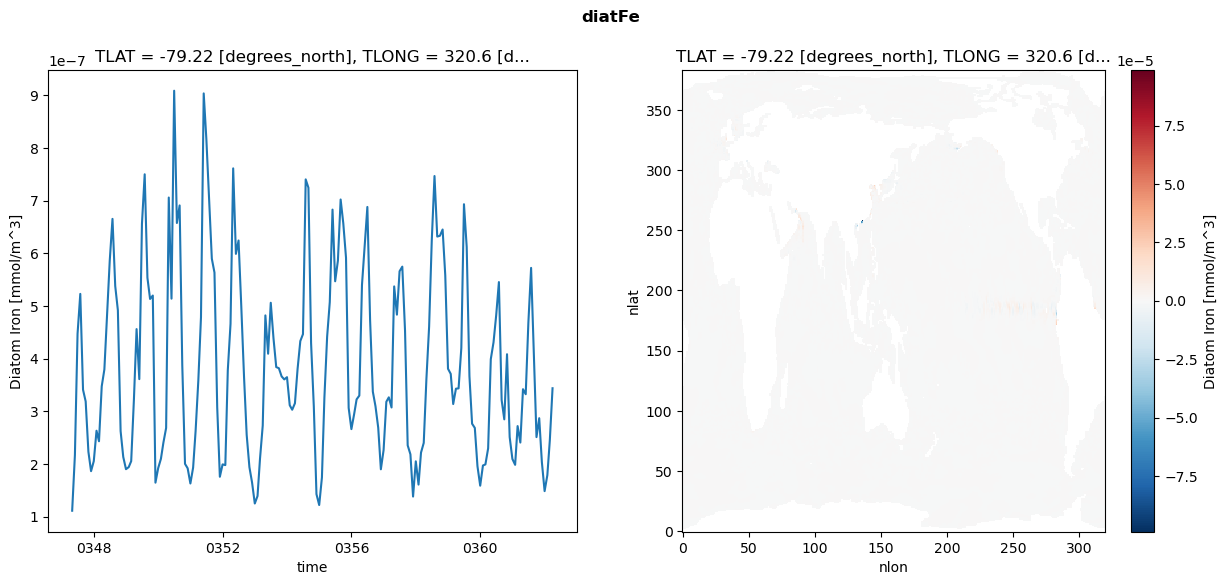

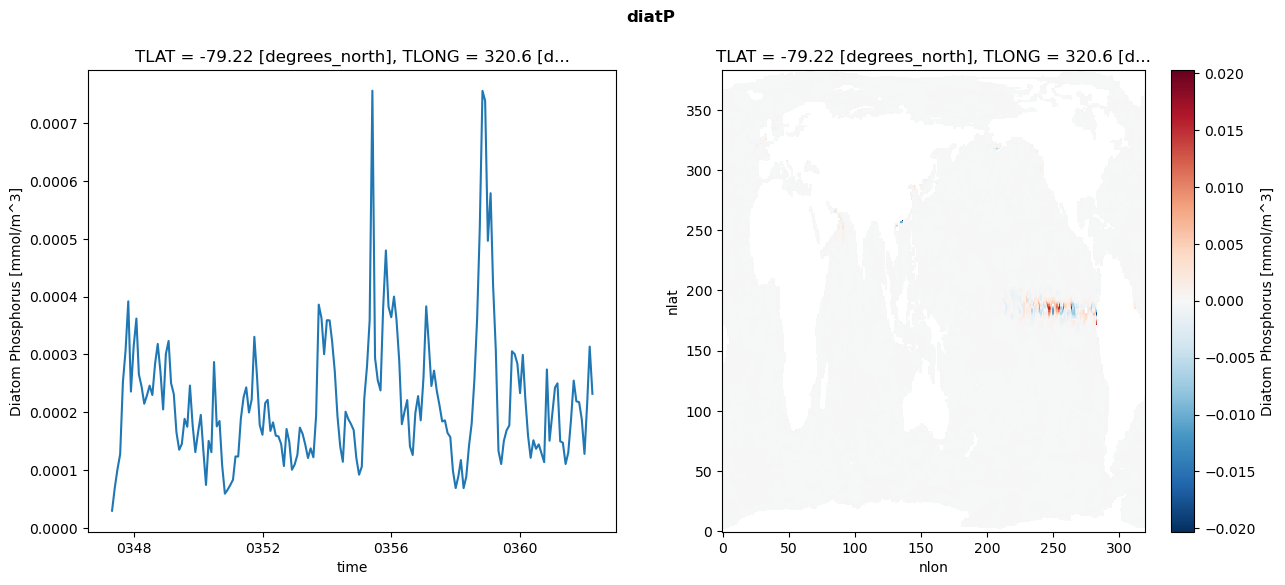

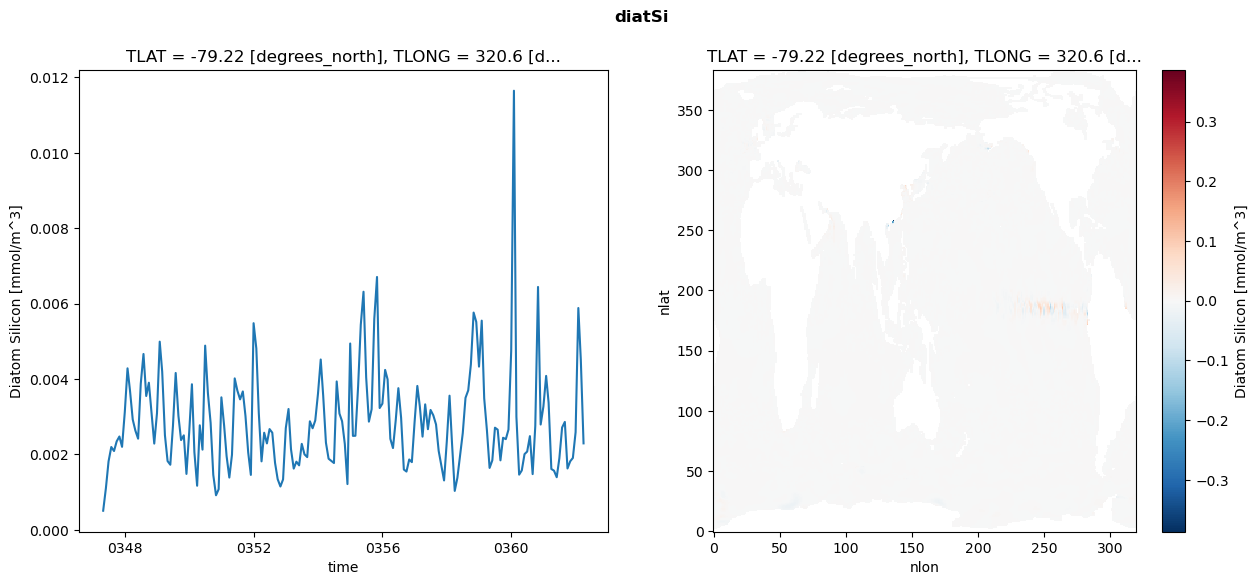

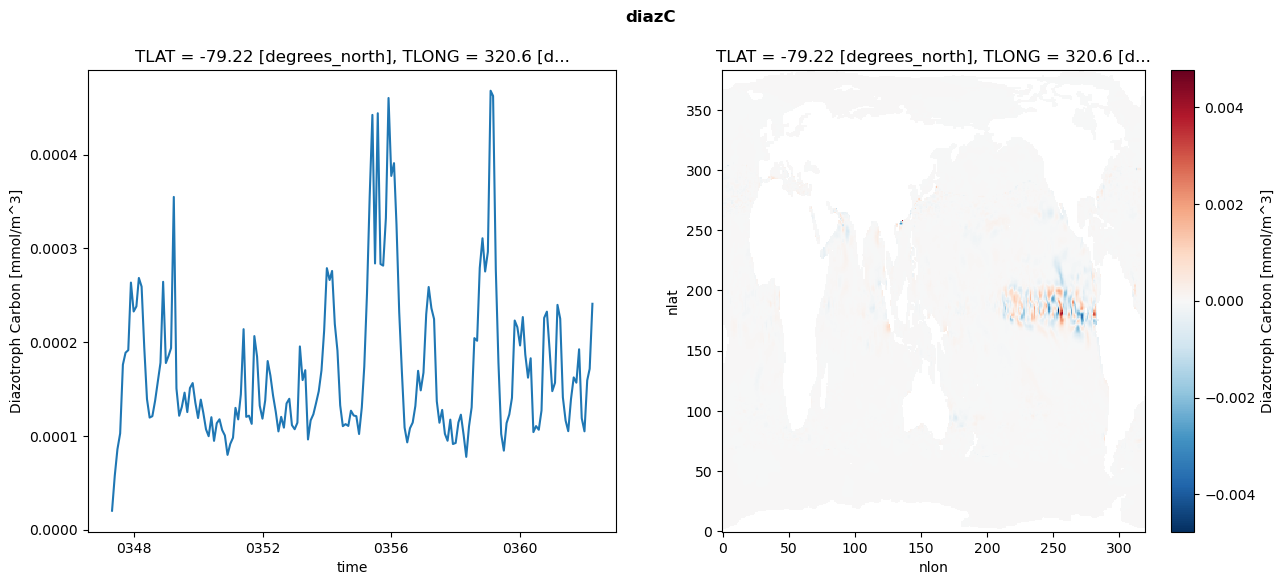

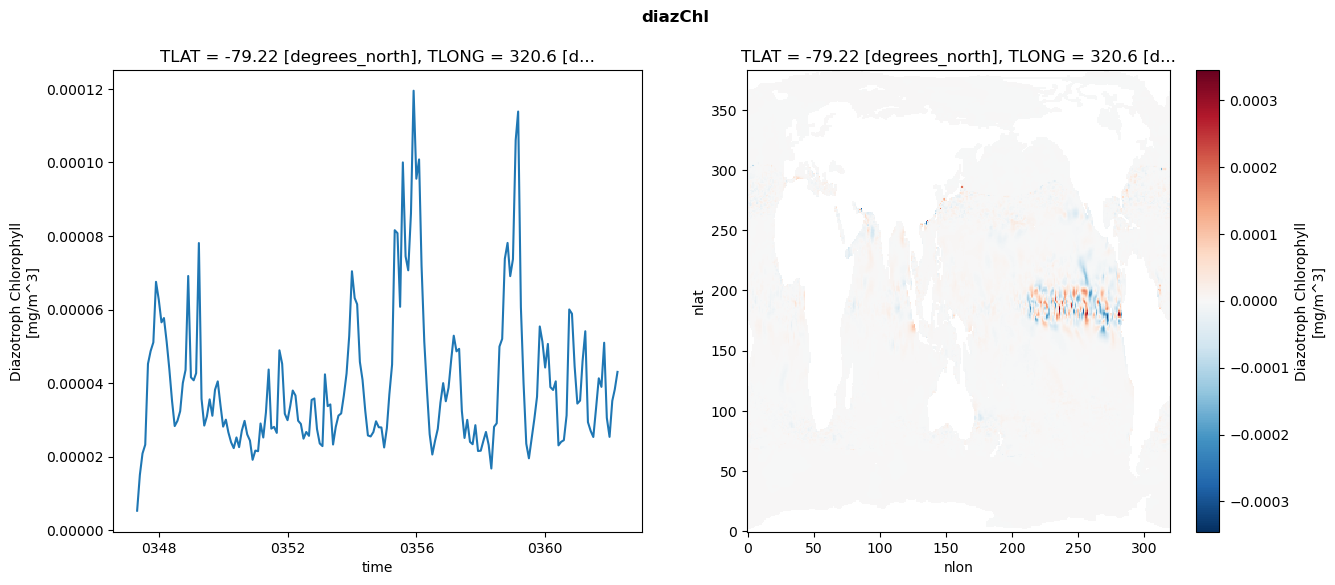

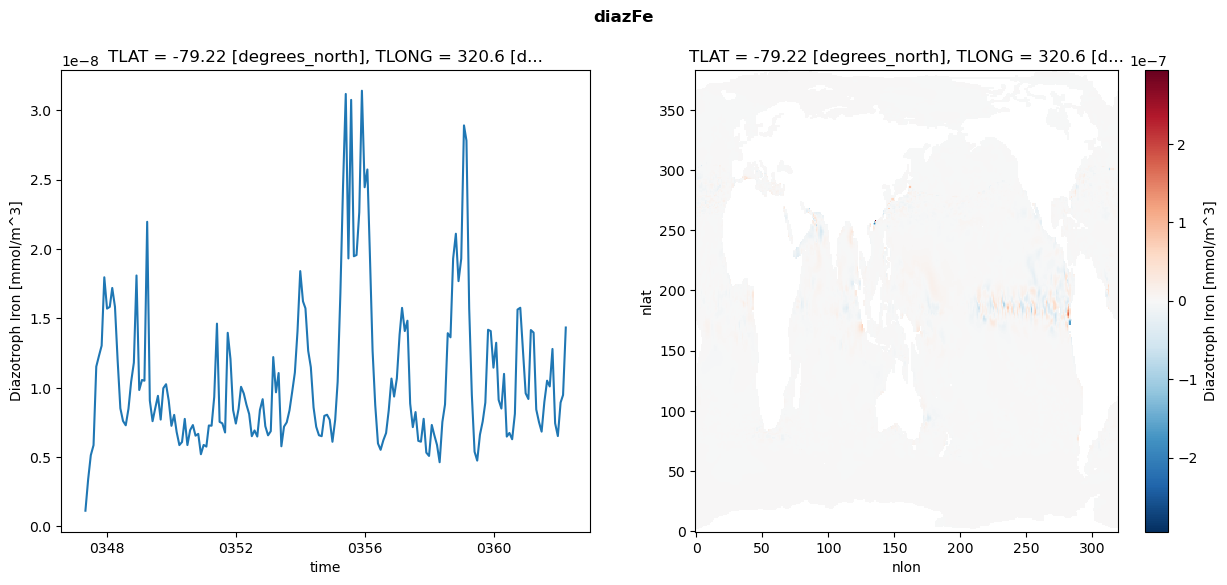

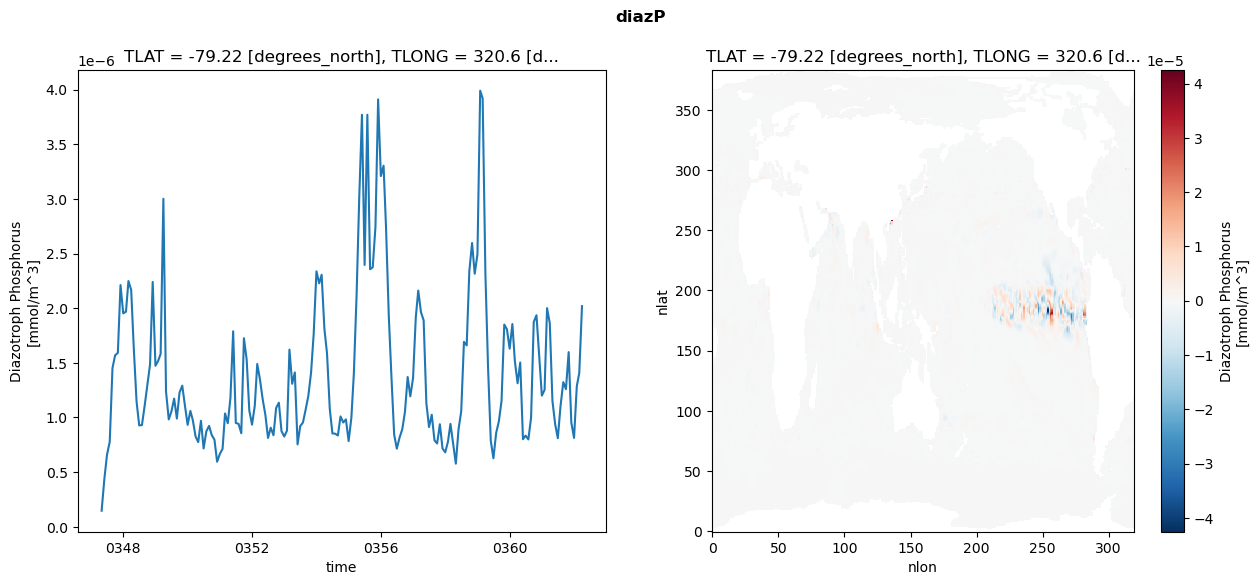

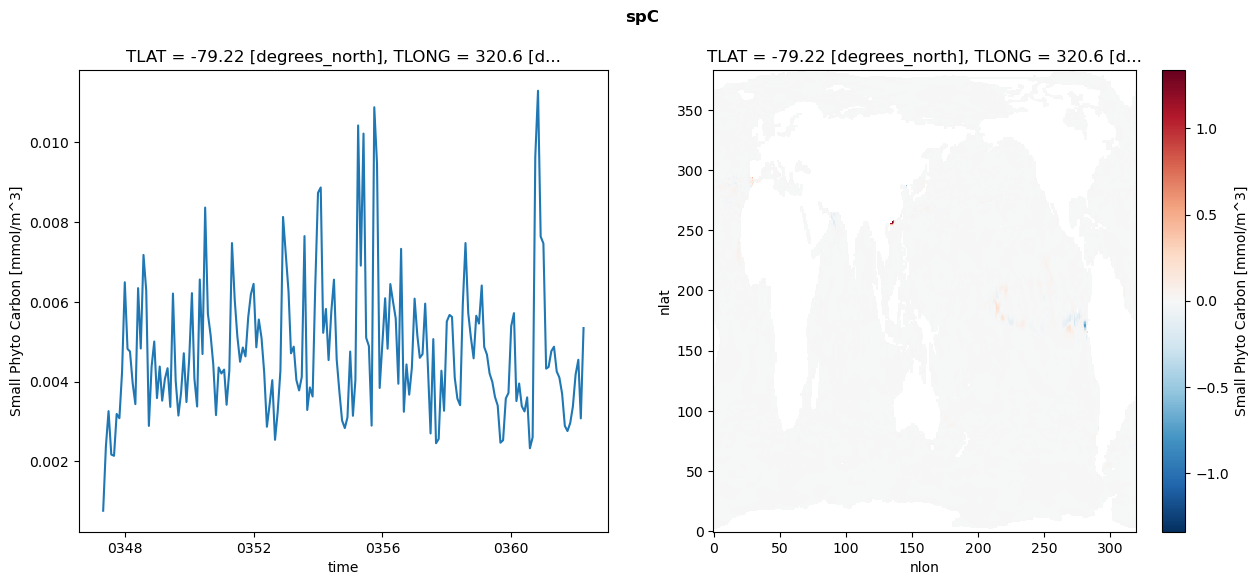

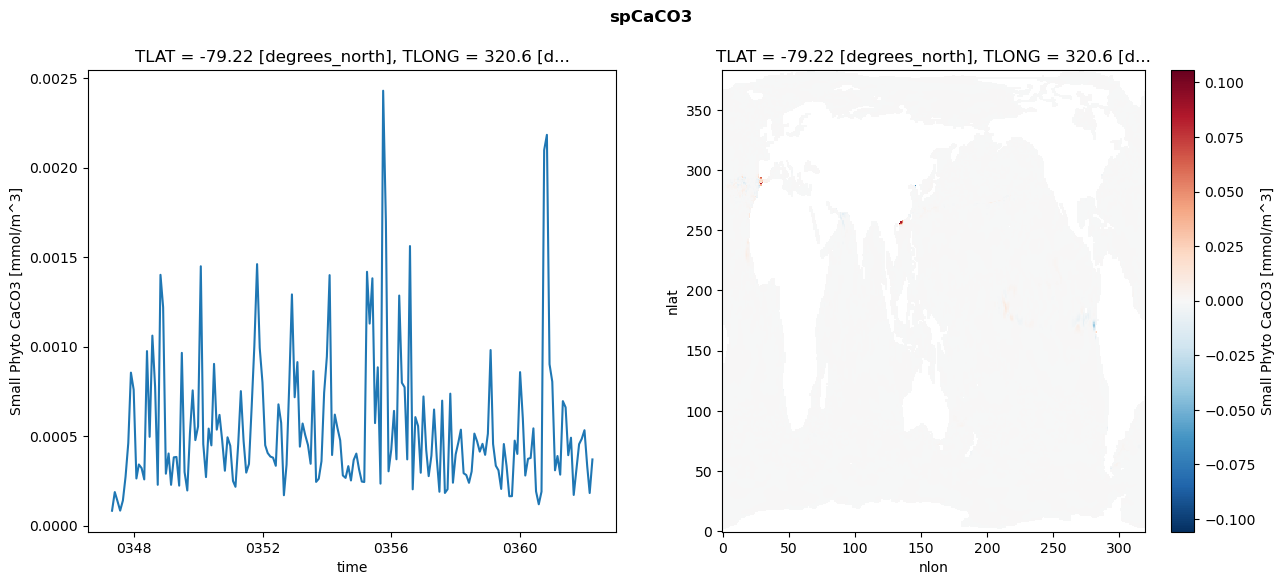

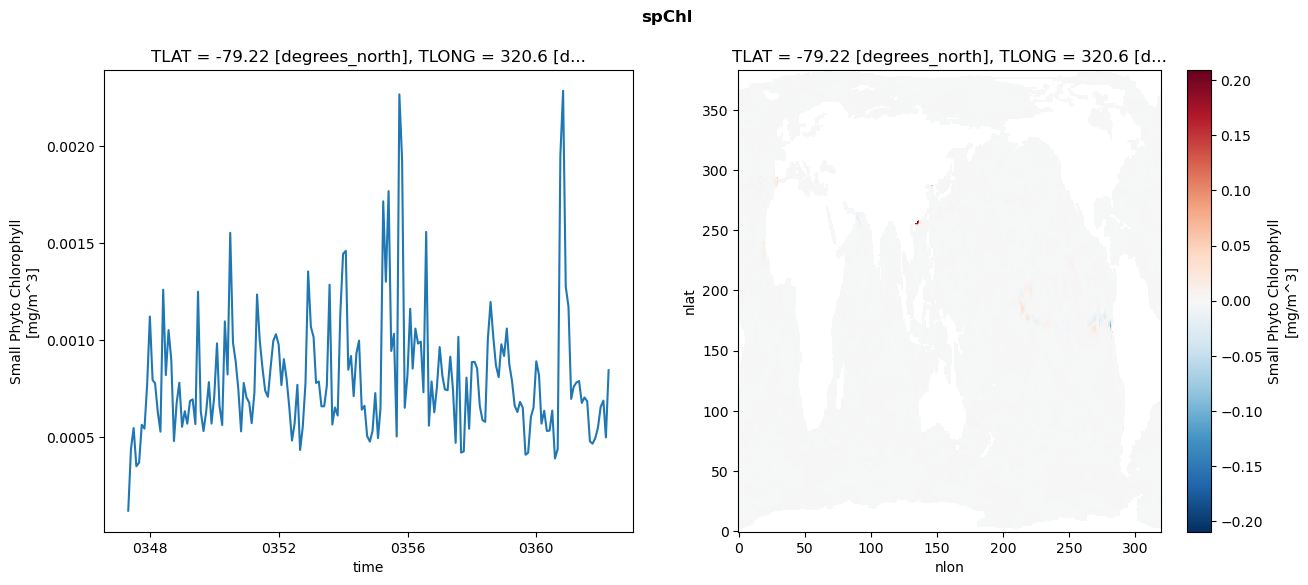

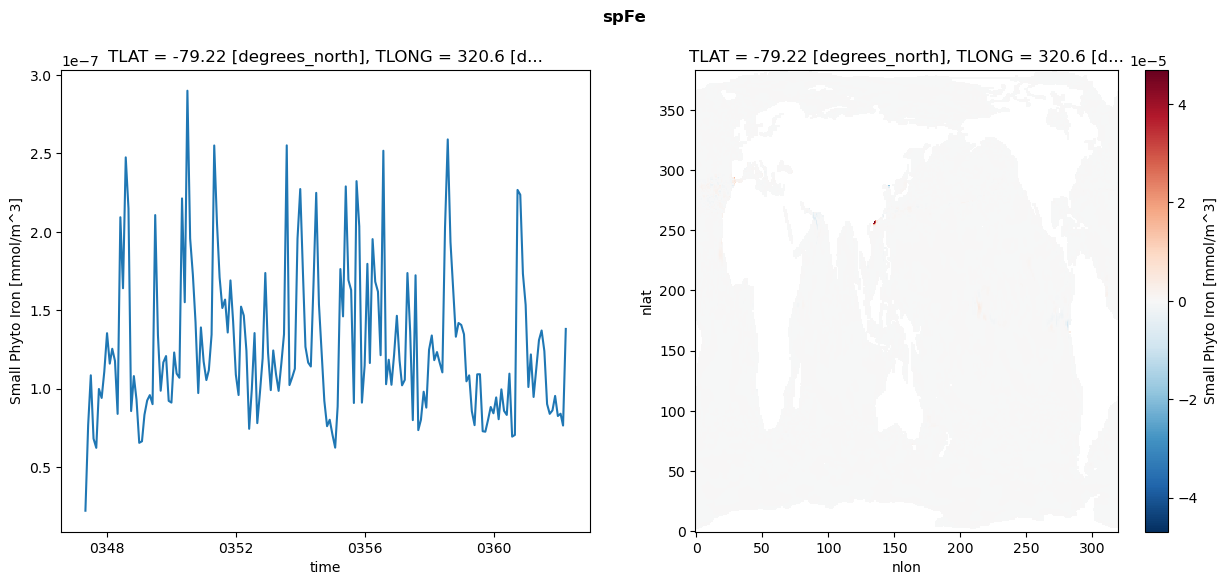

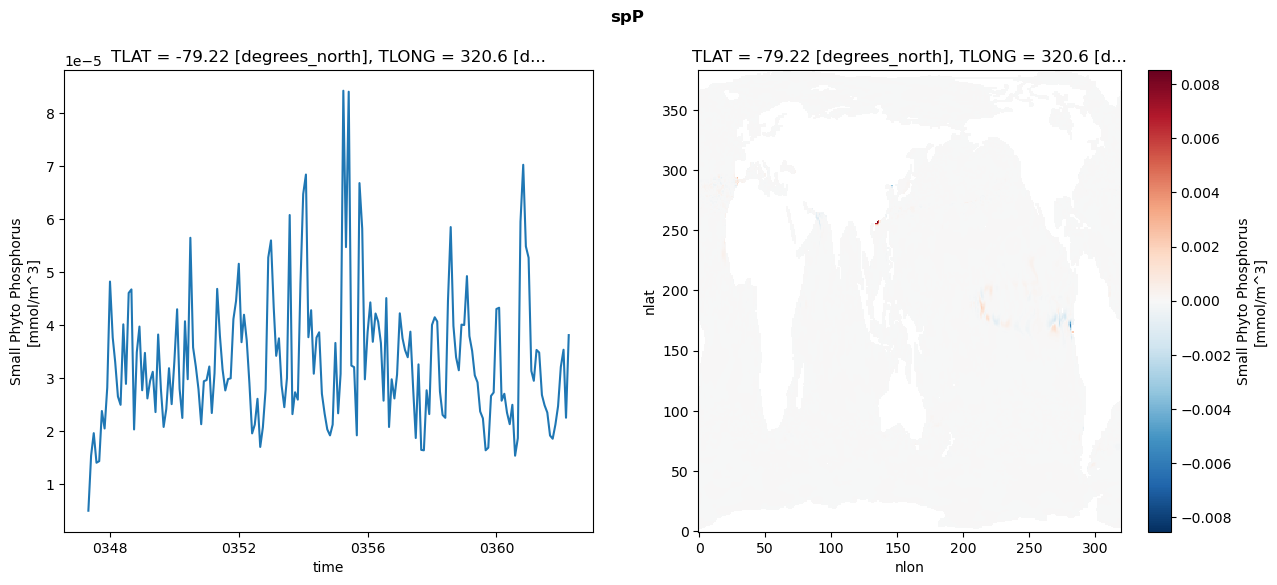

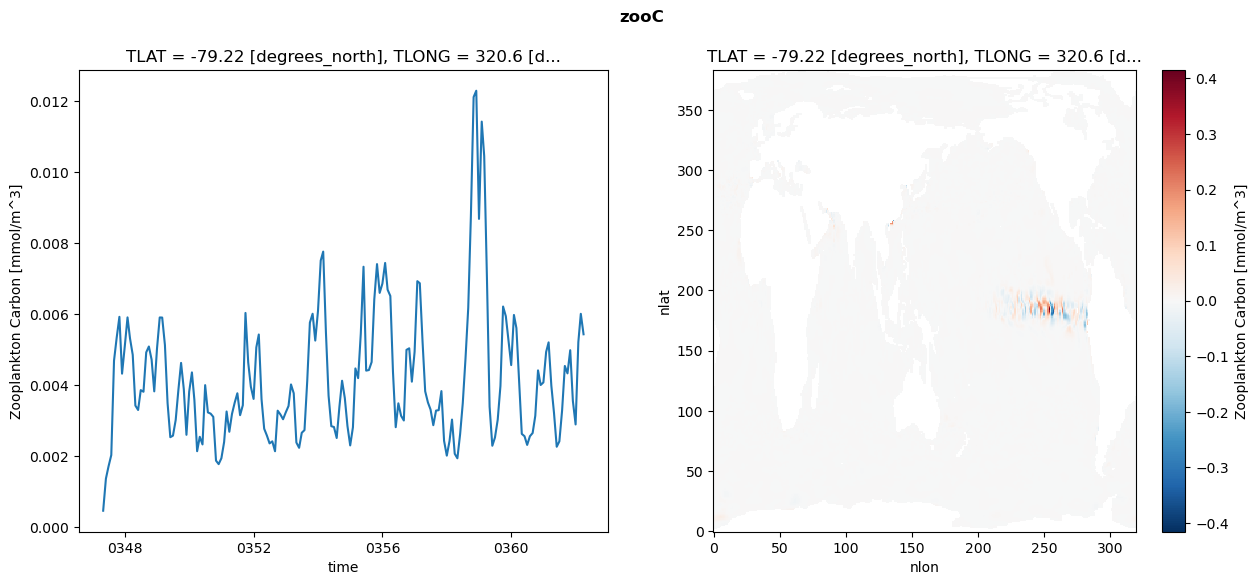

In [6]:
plt.rcParams.update({'figure.max_open_warning': 0})

for v in variables:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    ds_o[f"{v}_rmse"].plot(ax=axs[0])   
    ds_o[f"{v}_diff"].plot(ax=axs[1])
    plt.suptitle(v, fontweight="bold")